In [2]:
# 导入pygrib库用于load数据
import pygrib
import os
import os.path as osp
import numpy as np
from pprint import pprint
import xarray
import time

path1 = '/mnt/pami14/DATASET/METEOROLOGY/GT_micaps/2017/08/surface/plot/17080608.000'
path2 = '/mnt/pami14/DATASET/METEOROLOGY/GT_micaps/2017/08/surface/plot/17080620.000'
path3 = '/mnt/pami14/DATASET/METEOROLOGY/GT_micaps/2017/08/surface/plot/17080617.000'


### 修改数据路径/mnt/pami14/DATASET/METEOROLOGY/micaps_16_18/并测试与
### /mnt/pami14/DATASET/METEOROLOGY/GT_micaps的同一性

## 确定5个变量是否从plot取值对齐

In [3]:
with open(path1, encoding="GBK") as f:
    cPath_data = f.readlines()  
    
#     print (cPath_data)
    
    key_data = cPath_data[2:]    ## √
 
    print ('-'*28) 
    
#     print (key_data)   ## √
    
#     print ('-'*28)
'''
前半段67，后半段79
'''    
 ## √     
#     print (len(key_data[0]))
#     print (len(key_data[1]))
#     print (len(key_data[2]))
#     print (len(key_data[3]))
        
#     print (len(key_data[4]))
#     print (len(key_data[5]))
#     print (len(key_data[6]))
#     print (len(key_data[7]))    

'''
√
''' 
modal_dic = {}

# key_data = key_data[0:8]

# print (key_data)

print ('*'*28)

for i, oneLine in enumerate(key_data):

    # pre+post才是一行完整数据
    if (i+1)%2==0:
        #
        post_label = oneLine.split()
#         print ('post_label:', post_label)
        oneLabel = pre_label + post_label  # √ 长度26 
#         print ('oneLabel:', oneLabel)
#         print ('oneLabel_len:', len(oneLabel))
        
#         print ('-'*28)

        #
        index = int(oneLabel[0])
#         print ('index:', index)
        
        lon = float(oneLabel[1]) # √
#         print ('lon:', lon)
        
        lat = float(oneLabel[2]) # √
#         print ('lat:', lat)
        
        wind_direct = float(oneLabel[6])  ## 类型？？？  √  range❌ 0-360°(0°)，间隔为22.5°，16个方向
                                                    # 可考虑作为多分类问题或者序回归问题
#         print ('wind_direct:', wind_direct)        
        
        wind_velocity = float(oneLabel[7]) ## 类型？？？ √  range❌ 0-61.2m/s, 间隔？？，
                                        #考虑多分类问题(按风力等级)或者 
#         print ('wind_velocity:', wind_velocity)
              
        pressure = float(oneLabel[8])##   类型？？？ √华东气压(本站/海平面气压)范围是1020-1028，
                                        #暂考虑(序)回归问题   range&华东取值❌ 
#         print ('pressure:', pressure)
        
        # humidness
        dew_point = float(oneLabel[16])##   类型   √，range？？？
                                        #暂考虑(序)回归问题 
#         print ('dew_point:', dew_point)
      
        temperature = float(oneLabel[19])##   类型   √，range？？？
                                        #暂考虑(序)回归问题 
#         print ('temperature:', temperature)
        

        modal_dic[index] = (lon, lat, temperature, pressure, wind_direct, wind_velocity, dew_point)

#         print ('-'*28)

    pre_label = oneLine.split()
    
#     print ('pre_label:', pre_label)
    
    
# print ('-'*28)
'''
----------------------------
----------------------------
['48870  109.22   13.77    6    2    7  320    1   78   16    0    0\n', '      0   35    6 1000   24.1   20.0    0   29.7   23 9999    1    2   34    0\n', '48887  108.10   10.93    8    4    6  290    2   95   10    0    0\n', '      0   35    3 1500   23.9   22.0    0   26.1   20   18    1    2   26   10\n', '48823  106.15   20.43    3   32    5  160    1   54   14    0    0\n', '      0   38    5  600   27.0   9999    0   28.4   20   10    1    2   29   10\n', '48855  108.18   16.03    7    4    7    0    0   74   11    0    0\n', '      0   38    4  600   26.1   20.0    0   28.4   24   18    1    2   31    0\n']
****************************
pre_label: ['48870', '109.22', '13.77', '6', '2', '7', '320', '1', '78', '16', '0', '0']
post_label: ['0', '35', '6', '1000', '24.1', '20.0', '0', '29.7', '23', '9999', '1', '2', '34', '0']
oneLabel: ['48870', '109.22', '13.77', '6', '2', '7', '320', '1', '78', '16', '0', '0', '0', '35', '6', '1000', '24.1', '20.0', '0', '29.7', '23', '9999', '1', '2', '34', '0']
oneLabel_len: 26
----------------------------
index: 48870
lon: 109.22
lat: 13.77
wind_direct: 320
wind_velocity: 1
pressure: 78
dew_point: 24.1
temperature: 29.7
----------------------------
pre_label: ['0', '35', '6', '1000', '24.1', '20.0', '0', '29.7', '23', '9999', '1', '2', '34', '0']
pre_label: ['48887', '108.10', '10.93', '8', '4', '6', '290', '2', '95', '10', '0', '0']
post_label: ['0', '35', '3', '1500', '23.9', '22.0', '0', '26.1', '20', '18', '1', '2', '26', '10']
oneLabel: ['48887', '108.10', '10.93', '8', '4', '6', '290', '2', '95', '10', '0', '0', '0', '35', '3', '1500', '23.9', '22.0', '0', '26.1', '20', '18', '1', '2', '26', '10']
oneLabel_len: 26
----------------------------
index: 48887
lon: 108.1
lat: 10.93
wind_direct: 290
wind_velocity: 2
pressure: 95
dew_point: 23.9
temperature: 26.1
----------------------------
pre_label: ['0', '35', '3', '1500', '23.9', '22.0', '0', '26.1', '20', '18', '1', '2', '26', '10']
pre_label: ['48823', '106.15', '20.43', '3', '32', '5', '160', '1', '54', '14', '0', '0']
post_label: ['0', '38', '5', '600', '27.0', '9999', '0', '28.4', '20', '10', '1', '2', '29', '10']
oneLabel: ['48823', '106.15', '20.43', '3', '32', '5', '160', '1', '54', '14', '0', '0', '0', '38', '5', '600', '27.0', '9999', '0', '28.4', '20', '10', '1', '2', '29', '10']
oneLabel_len: 26
----------------------------
index: 48823
lon: 106.15
lat: 20.43
wind_direct: 160
wind_velocity: 1
pressure: 54
dew_point: 27.0
temperature: 28.4
----------------------------
pre_label: ['0', '38', '5', '600', '27.0', '9999', '0', '28.4', '20', '10', '1', '2', '29', '10']
pre_label: ['48855', '108.18', '16.03', '7', '4', '7', '0', '0', '74', '11', '0', '0']
post_label: ['0', '38', '4', '600', '26.1', '20.0', '0', '28.4', '24', '18', '1', '2', '31', '0']
oneLabel: ['48855', '108.18', '16.03', '7', '4', '7', '0', '0', '74', '11', '0', '0', '0', '38', '4', '600', '26.1', '20.0', '0', '28.4', '24', '18', '1', '2', '31', '0']
oneLabel_len: 26
----------------------------
index: 48855
lon: 108.18
lat: 16.03
wind_direct: 0
wind_velocity: 0
pressure: 74
dew_point: 26.1
temperature: 28.4
----------------------------
pre_label: ['0', '38', '4', '600', '26.1', '20.0', '0', '28.4', '24', '18', '1', '2', '31', '0'
'''

----------------------------
****************************


"\n----------------------------\n----------------------------\n['48870  109.22   13.77    6    2    7  320    1   78   16    0    0\n', '      0   35    6 1000   24.1   20.0    0   29.7   23 9999    1    2   34    0\n', '48887  108.10   10.93    8    4    6  290    2   95   10    0    0\n', '      0   35    3 1500   23.9   22.0    0   26.1   20   18    1    2   26   10\n', '48823  106.15   20.43    3   32    5  160    1   54   14    0    0\n', '      0   38    5  600   27.0   9999    0   28.4   20   10    1    2   29   10\n', '48855  108.18   16.03    7    4    7    0    0   74   11    0    0\n', '      0   38    4  600   26.1   20.0    0   28.4   24   18    1    2   31    0\n']\n****************************\npre_label: ['48870', '109.22', '13.77', '6', '2', '7', '320', '1', '78', '16', '0', '0']\npost_label: ['0', '35', '6', '1000', '24.1', '20.0', '0', '29.7', '23', '9999', '1', '2', '34', '0']\noneLabel: ['48870', '109.22', '13.77', '6', '2', '7', '320', '1', '78', '16', '0', '0', '

## 确定5个量的华东范围取值分布，横坐标取值范围，纵坐标为每个样本点取值

In [55]:
## 先打印单个MICAPS华东数据
# modal_dic[index] = (lon, lat, temperature, pressure, wind_direct, wind_velocity, dew_point)

import numpy as np
east_locBound = (20, 40, 110, 124)

for st_id, values in modal_dic.items():
    print ('lon-{}-lat-{}:'.format(values[0], values[1]))
    
    if 110<=values[0] and 124>=values[0] and 20<=values[1] and 40>=values[1]:
          print ('*')
#         print ('lon-{}-lat-{}:'.format(values[0], values[1]))
#         print ('st_id:', st_id)
#         print ('temperature:', values[2])
#         print ('pressure:', values[3])
#         print ('wind_direct:', values[4])
#         print ('wind_velocity:', values[5])
#         print ('dew_point:', values[6])
        
        


## 2017 6月 7月 8月的TPWD的取值直方图

In [3]:
import matplotlib.pyplot as plt
import pygrib
from operator import itemgetter #itemgetter用来去dict中的key，省去了使用lambda函数
from itertools import groupby #itertool还包含有其他很多函数，比如将多个list联合起来。
import os
import os.path as osp
import numpy as np
from pprint import pprint
import xarray
import time

def generateDic4Path(paths):

    dics = []
    
    for path in paths:
        modal_dic = {}
        with open(path, encoding="GBK") as f:
            
            cPath_data = f.readlines()  
            key_data = cPath_data[2:]    ## √

        for i, oneLine in enumerate(key_data):
            if (i+1)%2==0:
                #
                post_label = oneLine.split()
                oneLabel = pre_label + post_label  # √  
                index = int(oneLabel[0])
                lon = float(oneLabel[1]) # √        
                lat = float(oneLabel[2]) # √        
                wind_direct = float(oneLabel[6])
                wind_velocity = float(oneLabel[7])
                ## Press
                pressure  = convertPress_nor(float(oneLabel[8]))
                dew_point = float(oneLabel[16])     
                temperature = float(oneLabel[19])
                modal_dic[index] = (lon, lat, temperature, pressure, wind_direct, wind_velocity, dew_point)

            pre_label = oneLine.split()
        dics.append(modal_dic)
        
    return dics

east_locBound = (20, 40, 110, 124)

# modal_dic[index] = (lon, lat, temperature, pressure, wind_direct, wind_velocity, dew_point)

def crop_save_East_tpwd(dics_tpdw_all):
    tem_stValues = []
    press_stValues = []
    windd_stValues = []
    winds_stValues = []    
    dew_stValues = []

    for modal_dic in dics_tpdw_all:
        for st_id, values in modal_dic.items():
            if 110<=values[0] and 124>=values[0] and 20<=values[1] and 40>=values[1]:
                #
                tem_stValues.append(values[2]) 
                press_stValues.append(values[3]) 
                windd_stValues.append(values[4])
                winds_stValues.append(values[5])             
                dew_stValues.append(values[6])
            
    return tem_stValues, press_stValues, windd_stValues, winds_stValues, dew_stValues            
            
def remove9999(ME_values):
    ME_values_update = [value for value in ME_values if value!=9999]
    return ME_values_update

def getmaxmin(ME_values):
    _max = max(ME_values)
    _min = min(ME_values)
    return _max, _min

def groupMe_count(ME_values):
    # <class 'itertools.groupby'>
    oneGroup = groupby(sorted(ME_values),key=lambda x: x)
    # g: <itertools._grouper> listable
    counter = {k:len(list(g)) for k,g in oneGroup}
    print('counter:', counter)
    #
    for counts_single_key, counts_single_value in counter.items():
        print('{}-Value-logNum-{}'.format(counts_single_key, np.round(np.log(counts_single_value),7)))
        
    bins = list(counter.keys())
    height = np.log(list(counter.values()))
    
    return bins, height

def convertPress_nor(st_press):
    if st_press!=9999:
        st_press = float(st_press/10)
        if abs(round(st_press,2)+1000-1000)<abs(round(st_press,2)+900-1000):
            origin_st_press = round(st_press+1000,2)
        else:
            origin_st_press = round(st_press+900,2)

        convert_st_press = round(origin_st_press - (1000+900)/2,2)
        
    else:
        convert_st_press = 'error'
    
    return convert_st_press


def convertPress(st_press):
    if st_press!=9999:
        st_press = float(st_press/10)
        if abs(round(st_press,2)+1000-1000)<abs(round(st_press,2)+900-1000):
            convert_st_press = round(st_press+1000,2)
        else:
            convert_st_press = round(st_press+900,2)
            
    else:
        convert_st_press = 'error'
    
    return convert_st_press

def remove9999_4_press(press_values):
    press_values_update = [value for value in press_values if value!='error']
    return press_values_update

'''
tem_range: [-4 -2  0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42]

y: -1.2
_prob: [0.  0.6 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0. ] 更靠近置信度大的
 
 y: -1.8
_prob: [0.  0.9 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0. ]  更靠近置信度大的


press_range: [18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69 72 75 78 81]

 y: 52.3
_prob: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.57 0.43 0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]  51 54

'''
# ME_values→list(N) ME_range→ndarray ME_probs→N*len(meRanges)
'''
先取正概率分布
'''
def countProbConfidenceDev(ME_probs, ME_values, ME_range):
    conf_dev_count = 0
    conf_non_dev_count = 0
    ME_num = len(ME_values)
    for i in range(ME_num):
        #
        prob_me = [(prob, idx) for idx, prob in enumerate(ME_probs[i]) if prob!=0]
        prob_me_be = prob_me[0]
        prob_me_af = prob_me[1]
        #
        me_rangeValue = (ME_range[prob_me_be[1]], ME_range[prob_me_af[1]])
        #
        if prob_me_be[0]>prob_me_af[0]:
            if abs(me_rangeValue[0]-ME_values[i])>abs(me_rangeValue[1]-ME_values[i]):
                conf_dev_count = conf_dev_count + 1
                
            else:
                conf_non_dev_count = conf_non_dev_count + 1
                
        elif prob_me_be[0]<prob_me_af[0]:
            if abs(me_rangeValue[0]-ME_values[i])<abs(me_rangeValue[1]-ME_values[i]):
                conf_dev_count = conf_dev_count + 1
                
            else:
                conf_non_dev_count = conf_non_dev_count + 1
                
        else:
            continue
            
            
    return conf_dev_count, conf_non_dev_count
            
         
        

In [4]:
fix_micaps_path_2016 = '/mnt/pami14/DATASET/METEOROLOGY/micaps_16_18/2016'
fix_micaps_path_2017 = '/mnt/pami14/DATASET/METEOROLOGY/micaps_16_18/2017'
fix_micaps_path_2018 = '/mnt/pami14/DATASET/METEOROLOGY/micaps_16_18/2018'


## 就考虑江浙沪皖降水季(无6月plot)
months_16 = ['07', '08', '09']
months_17 = ['07', '08', '09']
months_18 = ['08', '09']

# 春夏秋冬都cover到
# months = ['06', '07', '08', '01','03','11']
# test_months = ['08']

# get path
paths_16months = [osp.join(fix_micaps_path_2016, m, 'surface','plot', m_file) for m in months_16 for m_file in os.listdir(osp.join(fix_micaps_path_2016, m, 'surface','plot'))]
paths_17months = [osp.join(fix_micaps_path_2017, m, 'surface','plot', m_file) for m in months_17 for m_file in os.listdir(osp.join(fix_micaps_path_2017, m, 'surface','plot'))]
paths_18months = [osp.join(fix_micaps_path_2018, m, 'surface','plot', m_file) for m in months_18 for m_file in os.listdir(osp.join(fix_micaps_path_2018, m, 'surface','plot'))]
paths_total = paths_16months + paths_17months + paths_18months 

# all dic for all stations
dics_tpdw_all = generateDic4Path(paths_total)
# crop eastern China stations and save
Tem_stValues, Press_stValues, Windd_stValues, Winds_stValues, Dew_stValues = crop_save_East_tpwd(dics_tpdw_all)
# remove 9999
_Tem_stValues = remove9999(Tem_stValues)
_Press_stValues = remove9999_4_press(Press_stValues)
_Windd_stValues = remove9999(Windd_stValues)
_Winds_stValues = remove9999(Winds_stValues)
_Dew_stValues = remove9999(Dew_stValues)

# print ('_Press_stValues:', _Press_stValues)
# get max and min
# tem_max, tem_min = getmaxmin(Tem_stValues)
# press_max, press_min = getmaxmin(Press_stValues)
# windd_max, windd_min = getmaxmin(Windd_stValues)
# winds_max, winds_min = getmaxmin(Winds_stValues)
# dew_max, dew_min = getmaxmin(Dew_stValues)
print ('-'*20)

# print ('count:', _Tem_stValues.count(9999))
# print ('count_0:', _Tem_stValues.count(float(9999)))
# print ('count_s:', _Tem_stValues.count(str(9999)))

# print ('tem:', _Tem_stValues)


--------------------


## C3AE标签及Range[负数可以表达，但需要调节超参]

In [4]:
def generateProbsLabels(targets, meRanges): 
    # [....,threshold] interval
    k = meRanges[1] - meRanges[0]
    probs = []    
    #
    for y in targets:
        print ('y:', y)
        index = 0
        # init prob
        prob = np.zeros(len(meRanges))
        # upper Bound [0...,1]
        if  y > meRanges[-1]:
            prob[-1] = 1.
#             print ('-->ceil--')
        # lower Bound [0,...,y/k-1,...,0]
        elif y < meRanges[0]:
            prob[0] = 1.
#             print ('--<floor--')
        # fall linesegment
        elif y % k == 0:
            prob[int(y/k) - 1] = 1
#             print ('--segment--')
        # non-linesegment
        else: 
            # 得到区间下标
            for i in range(len(meRanges)):
                if meRanges[i] > y:
                    index = i
                    break 
            # 计算λ1 λ2       
            prob[index - 1] = round((1 - (y - np.floor(y / k) * k)/k), 2)
            prob[index] = round((1 - (np.ceil(y / k) * k - y)/k), 2)
        
        print ('_prob:', prob)
        # [meRanges,...]     
        probs.append(prob)
        # N * len(meRanges)
    probs = np.stack(probs).astype(np.float32)
    return probs


def generateMultiLabels(Metargets, flag):
    if flag == 'windd':
        wd_all_angles = list(set(Metargets))
        wd_all_angles.sort()
        print ('all_angles_num:', len(wd_all_angles))
        print ('all_angles:', wd_all_angles) 
        one_hot_init = np.eye(len(wd_all_angles), len(wd_all_angles))
        # generate indice for all angles
        angels_indice = {angle:idx for idx, angle in enumerate(wd_all_angles)}
        
        # labelling
        windd_one_hot_labels = [one_hot_init[angels_indice[tar]] for tar in Metargets]
        return windd_one_hot_labels
    
    if flag == 'winds':
        winds_one_hots = []
        wd_all_speed = list(set(Metargets))
        wd_all_speed.sort()
        print ('all_speed_num:', len(wd_all_speed))
        print ('all_speeds:', wd_all_speed) 
        # 0-12级台风 m/s
        one_hot_init = np.eye(12, 12)
        
        for meTar in Metargets:
            if meTar==0 and meTar<=0.2:
                meTar_01 = one_hot_init[0]
                
            elif meTar>0.2 and meTar<=1.5:
                meTar_01 = one_hot_init[1]
        
            elif meTar>1.5 and meTar<=3.3:
                meTar_01 = one_hot_init[2]

            elif meTar>3.3 and meTar<=5.4:
                meTar_01 = one_hot_init[3]
                
            elif meTar>5.4 and meTar<=7.9:
                meTar_01 = one_hot_init[4]
                
            elif meTar>7.9 and meTar<=10.7:
                meTar_01 = one_hot_init[5]
                
            elif meTar>10.7 and meTar<=13.8:
                meTar_01 = one_hot_init[6]
                
            elif meTar>13.8 and meTar<=17.1:
                meTar_01 = one_hot_init[7]
                
            elif meTar>17.1 and meTar<=20.7:
                meTar_01 = one_hot_init[8]

            elif meTar>20.7 and meTar<=24.4:
                meTar_01 = one_hot_init[9]
                
            elif meTar>24.4 and meTar<=28.4:
                meTar_01 = one_hot_init[10]
                
            else:    
                meTar_01 = one_hot_init[11]
            
            winds_one_hots.append(meTar_01)
            
        return winds_one_hots
            
            

In [ ]:
'''
C3AE Tem
'''
tem_range = np.arange(-4,43,2)
print ('tem_range:', tem_range)
print ('tem_range_length:', len(tem_range))

print ('-'*20)
#
_Tem_stValues_positive = [stv for stv in _Tem_stValues if stv>5]
# _Tem_stValues_negtive = [stv for stv in _Tem_stValues if stv<=0]

# print (len(_Tem_stValues_negtive))

#
prob_tem = generateProbsLabels(np.array(_Tem_stValues_positive), tem_range)

# prob_tem = generateProbsLabels(np.array(_Tem_stValues_negtive), tem_range)

conf_dev_count, conf_non_dev_count = countProbConfidenceDev(prob_tem, _Tem_stValues_positive, tem_range)

print ('conf_dev_count:', conf_dev_count)
print ('conf_non_dev_count:', conf_non_dev_count)



print ('prob_tem:', prob_tem[0:30])


# y: -3.1
# _prob: [0.55 0.45 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
#  0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


'''
tem_range: [-4 -2  0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42]

y: -1.2
_prob: [0.  0.6 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0. ] 更靠近置信度大的
 
 y: -1.8
_prob: [0.  0.9 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0. ]  更靠近置信度大的


press_range: [18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69 72 75 78 81]

 y: 52.3
_prob: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.57 0.43 0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]  51 54

'''

tem_range: [-4 -2  0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42]
tem_range_length: 24
--------------------
y: 32.8
_prob: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.6 0.4 0.  0.  0.  0. ]
y: 34.0
_prob: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y: 26.4
_prob: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.8 0.2 0.
 0.  0.  0.  0.  0.  0. ]
y: 26.7
_prob: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.65 0.35 0.   0.   0.   0.   0.   0.   0.  ]
y: 32.6
_prob: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.7 0.3 0.  0.  0.  0. ]
y: 29.1
_prob: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.45 0.55 0.   0.   0.   0.   0.   0.  ]
y: 33.2
_prob: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.4 0.6 0.  0.  0.  0. ]
y: 34.9
_prob: [0.   0.   0.   0.   0.   0.   0.   0.   0.  

In [25]:
'''
C3AE Press
'''
# 18 - 82
press_range = np.arange(18,82,3)
print ('press_range:', press_range)
print ('press_range_length:', len(press_range))

print ('-'*20)
#
# _Press_stValues_positive = [stv for stv in _Press_stValues if stv>5]
# _Press_stValues_negtive = [stv for stv in _Press_stValues if stv<=0]

# print (len(_Press_stValues_negtive))
#
prob_press = generateProbsLabels(np.array(_Press_stValues[200:300]), press_range)

# print ('prob_press:', prob_press)

# y: 55.7
# _prob: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.43 0.57
#  0.   0.   0.   0.   0.   0.   0.   0.  ]  54 57



press_range: [18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69 72 75 78 81]
press_range_length: 22
--------------------
y: 57.6
_prob: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0.
 0.  0.  0.  0. ]
y: 55.7
_prob: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.43 0.57
 0.   0.   0.   0.   0.   0.   0.   0.  ]
y: 55.1
_prob: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.63 0.37
 0.   0.   0.   0.   0.   0.   0.   0.  ]
y: 54.6
_prob: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0.  0.
 0.  0.  0.  0. ]
y: 53.4
_prob: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.8 0.  0.  0.  0.  0.
 0.  0.  0.  0. ]
y: 55.9
_prob: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.37 0.63
 0.   0.   0.   0.   0.   0.   0.   0.  ]
y: 53.8
_prob: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.07 0.93 0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
y: 56.5
_prob: [0.   0.   0.   0.   0.   0.   0.  

In [65]:
'''
wind direction muti-labels
'''
#
# __Windd_stValues_positive = [stv for stv in _Windd_stValues if stv>5]
# __Windd_stValues_negtive = [stv for stv in _Windd_stValues if stv<=0]

print (_Windd_stValues[20:30])
#
windd_one_hot_labels = generateMultiLabels(_Windd_stValues, 'windd')

print ('windd_one_hot_labels:', windd_one_hot_labels[20:30])

[40.0, 160.0, 220.0, 110.0, 160.0, 140.0, 220.0, 200.0, 200.0, 360.0]
all_angles_num: 37
all_angles: [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0]
windd_one_hot_labels: [array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 

In [45]:
'''
wind speed muti-labels
'''
# __Windd_stValues_positive = [stv for stv in _Windd_stValues if stv>5]
# __Windd_stValues_negtive = [stv for stv in _Windd_stValues if stv<=0]

print (_Winds_stValues[60:90])
#
winds_one_hot_labels = generateMultiLabels(_Winds_stValues, 'winds')

print ('winds_one_hot_labels:', winds_one_hot_labels[20:30])

[3.0, 1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 7.0, 1.0, 2.0, 1.0, 3.0, 5.0, 2.0, 1.0, 2.0, 5.0, 1.0, 1.0, 1.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 1.0, 1.0, 1.0]
all_speed_num: 44
all_speeds: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 35.0, 38.0, 39.0, 41.0, 45.0, 60.0, 81.0, 82.0, 85.0, 91.0, 93.0]
winds_one_hot_labels: [array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0

In [52]:
'''
C3AE Dew
'''
# -16 - 33
Dew_range = np.arange(-16,34,2)
print ('Dew_range:', Dew_range)
print ('-'*20)
#
# _Dew_stValues_positive = [stv for stv in _Dew_stValues if stv>5]
_Dew_stValues_negtive = [stv for stv in _Dew_stValues if stv<=0]

# print (len(_Dew_stValues_negtive))
#
prob_Dew = generateProbsLabels(np.array(_Dew_stValues_negtive)[12:20], Dew_range)

# print ('prob_Dew:', prob_Dew)

# y: -3.9
# _prob: [0.   0.   0.   0.   0.   0.   0.95 0.05 0.   0.   0.   0.   0.   0.
#  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]



Dew_range: [-16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16  18
  20  22  24  26  28  30  32]
--------------------
y: -3.2
_prob: [0.  0.  0.  0.  0.  0.  0.6 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0. ]
y: -2.3
_prob: [0.   0.   0.   0.   0.   0.   0.15 0.85 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
y: -1.0
_prob: [0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0. ]
y: -0.1
_prob: [0.   0.   0.   0.   0.   0.   0.   0.05 0.95 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
y: -0.8
_prob: [0.  0.  0.  0.  0.  0.  0.  0.4 0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0. ]
y: -2.8
_prob: [0.  0.  0.  0.  0.  0.  0.4 0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0. ]
y: -5.1
_prob: [0.   0.   0.   0.   0.   0.55 0.45 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   

counter: {16.2: 1, 16.5: 1, 17.2: 1, 17.6: 1, 17.9: 1, 18.4: 1, 18.5: 1, 18.7: 1, 19.7: 1, 19.9: 3, 20.4: 1, 20.8: 2, 21.0: 2, 21.1: 3, 21.2: 3, 21.3: 2, 21.4: 3, 21.6: 2, 21.7: 5, 21.8: 2, 22.0: 1, 22.1: 4, 22.2: 4, 22.3: 3, 22.4: 3, 22.5: 3, 22.6: 3, 22.7: 3, 22.8: 5, 22.9: 3, 23.0: 9, 23.1: 3, 23.2: 4, 23.3: 3, 23.4: 5, 23.5: 3, 23.6: 8, 23.7: 5, 23.8: 3, 23.9: 3, 24.0: 4, 24.1: 3, 24.3: 3, 24.4: 6, 24.5: 3, 24.6: 4, 24.7: 5, 24.8: 3, 24.9: 4, 25.0: 2, 25.1: 7, 25.2: 6, 25.3: 3, 25.4: 7, 25.5: 5, 25.6: 5, 25.7: 5, 25.8: 1, 25.9: 1, 26.0: 3, 26.1: 7, 26.2: 4, 26.3: 2, 26.4: 2, 26.5: 5, 26.6: 6, 26.7: 6, 26.8: 1, 26.9: 3, 27.0: 1, 27.1: 5, 27.2: 4, 27.3: 4, 27.4: 7, 27.5: 2, 27.6: 3, 27.7: 2, 27.8: 3, 27.9: 3, 28.0: 3, 28.1: 1, 28.2: 2, 28.3: 4, 28.4: 1, 28.5: 3, 28.6: 5, 28.7: 4, 28.8: 2, 28.9: 2, 29.0: 1, 29.1: 1, 29.2: 2, 29.6: 1, 29.7: 1, 30.0: 1, 30.2: 1}
16.2-Value-logNum-0.0
16.5-Value-logNum-0.0
17.2-Value-logNum-0.0
17.6-Value-logNum-0.0
17.9-Value-logNum-0.0
18.4-Value-logNu

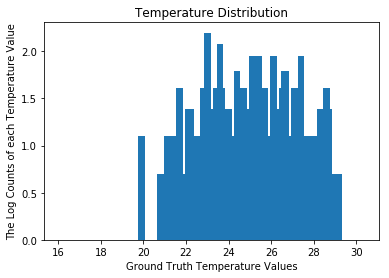

In [68]:

# group and count
Bins, Height = groupMe_count(_Tem_stValues)

# plot
plt.bar(Bins, height=Height,linestyle='solid',width=0.3)
plt.title("Temperature Distribution")
plt.xlabel("Ground Truth Temperature Values")
plt.ylabel("The Log Counts of each Temperature Value")
plt.show()


counter: {9.9: 1, 10.6: 1, 11.7: 1, 12.5: 1, 14.8: 1, 16.2: 1, 16.4: 1, 17.0: 1, 17.5: 1, 17.6: 1, 18.0: 1, 18.6: 2, 18.9: 1, 19.1: 1, 20.5: 2, 22.0: 1, 22.1: 1, 22.3: 1, 22.5: 1, 22.7: 1, 22.8: 1, 23.0: 1, 23.6: 1, 24.2: 1, 24.4: 1, 24.7: 1, 24.8: 1, 25.0: 1, 26.0: 1, 26.9: 1, 27.1: 1, 27.4: 3, 27.6: 1, 27.7: 1, 28.1: 2, 28.2: 1, 28.3: 1, 28.9: 4, 29.2: 1, 29.3: 1, 29.5: 1, 29.6: 3, 29.7: 1, 29.9: 1, 30.0: 1, 30.4: 2, 30.5: 2, 30.6: 3, 31.0: 1, 31.1: 2, 31.2: 3, 31.3: 1, 31.4: 1, 31.5: 1, 31.6: 3, 31.7: 1, 31.8: 3, 32.0: 1, 32.2: 3, 32.4: 1, 32.5: 1, 32.6: 2, 32.7: 1, 32.9: 4, 33.0: 2, 33.1: 3, 33.3: 2, 33.5: 2, 33.6: 1, 33.7: 2, 33.9: 2, 34.0: 3, 34.1: 1, 34.2: 2, 34.3: 3, 34.4: 1, 34.5: 3, 34.6: 1, 34.7: 1, 34.8: 1, 34.9: 1, 35.0: 4, 35.1: 3, 35.3: 2, 35.4: 1, 35.5: 3, 35.6: 1, 35.7: 3, 35.8: 1, 35.9: 6, 36.0: 1, 36.1: 5, 36.2: 4, 36.3: 3, 36.4: 1, 36.5: 3, 36.6: 5, 36.7: 2, 36.8: 5, 36.9: 5, 37.0: 5, 37.1: 3, 37.2: 6, 37.3: 6, 37.4: 2, 37.5: 7, 37.6: 3, 37.7: 7, 37.8: 6, 37.9: 6, 3

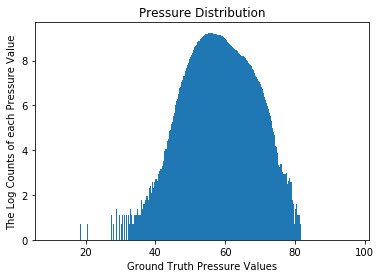

curr_path: /home/yqliu/EC-BiasCorrecting/evaluations/quantify


In [11]:
import os
import matplotlib.pyplot as plt
import os.path as osp


# group and count
Bins, Height = groupMe_count(_Press_stValues)

# plot
bar = plt.bar(Bins, height=Height,linestyle='solid',width=0.3)
plt.title("Pressure Distribution")
plt.xlabel("Ground Truth Pressure Values")
plt.ylabel("The Log Counts of each Pressure Value")
plt.show()

curr_path  = os.getcwd()
print ('curr_path:', curr_path)

plt.savefig(osp.join(curr_path, 'pressure_distribution.jpg'),dpi=300)



counter: {0.0: 83098, 10.0: 614, 20.0: 86798, 30.0: 657, 40.0: 93965, 50.0: 756, 60.0: 779, 70.0: 93515, 80.0: 890, 90.0: 94883, 100.0: 1005, 110.0: 84147, 120.0: 758, 130.0: 582, 140.0: 81044, 150.0: 743, 160.0: 77096, 170.0: 721, 180.0: 81585, 190.0: 915, 200.0: 73663, 210.0: 688, 220.0: 65530, 230.0: 619, 240.0: 652, 250.0: 54049, 260.0: 751, 270.0: 50723, 280.0: 418, 290.0: 49999, 300.0: 437, 310.0: 371, 320.0: 55846, 330.0: 405, 340.0: 62885, 350.0: 449, 360.0: 81068}
11.3277759
6.4199949
11.3713389
6.487684
11.4506777
6.6280414
6.658011
11.4458771
6.7912215
11.4603998
6.9127428
11.3403205
6.6306834
6.3664704
11.3027475
6.610696
11.2528067
6.5806391
11.3094007
6.8189241
11.2072559
6.5337888
11.0902633
6.4281053
6.4800446
10.8976463
6.6214057
10.8341347
6.0354814
10.8197583
6.0799332
5.9162021
10.9303532
6.0038871
11.0490629
6.1070229
11.3030436
37


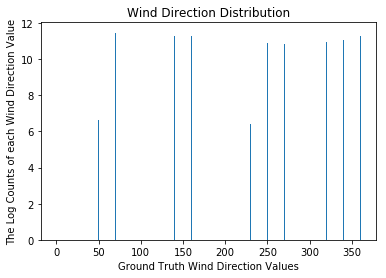

In [40]:
# group and count
Bins, Height = groupMe_count(_Windd_stValues)

# plot 37
print (len(Bins))

plt.bar(Bins, height=Height,linestyle='solid',width=0.3)
plt.title("Wind Direction Distribution")
plt.xlabel("Ground Truth Wind Direction Values")
plt.ylabel("The Log Counts of each Wind Direction Value")
plt.show()

counter: {0.0: 83037, 1.0: 435341, 2.0: 379177, 3.0: 204942, 4.0: 97577, 5.0: 43152, 6.0: 18904, 7.0: 9050, 8.0: 4685, 9.0: 2679, 10.0: 1508, 11.0: 977, 12.0: 682, 13.0: 450, 14.0: 300, 15.0: 203, 16.0: 149, 17.0: 101, 18.0: 58, 19.0: 43, 20.0: 19, 21.0: 14, 22.0: 6, 23.0: 6, 24.0: 5, 25.0: 3, 26.0: 3, 27.0: 4, 28.0: 2, 29.0: 3, 30.0: 5, 32.0: 2, 33.0: 2, 35.0: 3, 38.0: 1, 39.0: 1, 41.0: 1, 45.0: 3, 60.0: 1, 81.0: 1, 82.0: 1, 85.0: 1, 91.0: 1, 93.0: 1}
0.0-Value-logNum-11.3270416
1.0-Value-logNum-12.9838849
2.0-Value-logNum-12.8457584
3.0-Value-logNum-12.2304823
4.0-Value-logNum-11.4883971
5.0-Value-logNum-10.672484
6.0-Value-logNum-9.8471288
7.0-Value-logNum-9.11052
8.0-Value-logNum-8.4521212
9.0-Value-logNum-7.8931989
10.0-Value-logNum-7.3185395
11.0-Value-logNum-6.8844867
12.0-Value-logNum-6.5250297
13.0-Value-logNum-6.1092476
14.0-Value-logNum-5.7037825
15.0-Value-logNum-5.313206
16.0-Value-logNum-5.0039463
17.0-Value-logNum-4.6151205
18.0-Value-logNum-4.060443
19.0-Value-logNum-3.

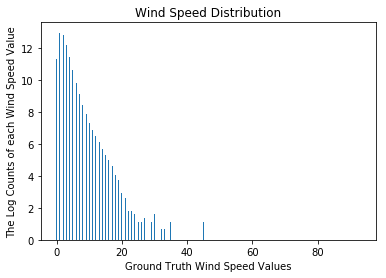

In [69]:
# group and count
Bins, Height = groupMe_count(_Winds_stValues)

# plot
plt.bar(Bins, height=Height,linestyle='solid',width=0.3)
plt.title("Wind Speed Distribution")
plt.xlabel("Ground Truth Wind Speed Values")
plt.ylabel("The Log Counts of each Wind Speed Value")
plt.show()

counter: {-80.0: 14, -37.3: 1, -35.7: 1, -34.4: 1, -32.2: 1, -30.3: 1, -27.5: 1, -26.0: 1, -25.9: 1, -25.1: 1, -24.1: 1, -23.7: 1, -22.8: 1, -22.3: 1, -20.1: 1, -19.7: 1, -18.9: 1, -18.8: 1, -18.6: 1, -17.3: 1, -17.0: 1, -16.6: 1, -16.5: 1, -15.7: 1, -15.5: 2, -15.1: 1, -14.8: 1, -14.4: 1, -14.2: 1, -13.9: 1, -13.8: 3, -13.7: 1, -13.6: 1, -13.3: 1, -13.0: 2, -12.9: 1, -12.8: 2, -12.7: 2, -12.5: 3, -12.3: 1, -12.2: 2, -12.1: 1, -12.0: 1, -11.7: 1, -11.6: 1, -11.4: 1, -11.3: 1, -11.2: 4, -11.1: 4, -11.0: 1, -10.9: 3, -10.8: 3, -10.7: 2, -10.6: 2, -10.5: 1, -10.4: 4, -10.3: 2, -10.2: 3, -10.1: 2, -10.0: 5, -9.9: 4, -9.8: 2, -9.7: 5, -9.6: 5, -9.5: 3, -9.4: 4, -9.3: 2, -9.2: 7, -9.1: 3, -9.0: 4, -8.9: 4, -8.8: 6, -8.7: 5, -8.6: 9, -8.5: 3, -8.4: 5, -8.3: 4, -8.2: 4, -8.1: 6, -8.0: 10, -7.9: 3, -7.8: 6, -7.7: 5, -7.6: 9, -7.5: 6, -7.4: 9, -7.3: 10, -7.2: 10, -7.1: 13, -7.0: 11, -6.9: 5, -6.8: 15, -6.7: 15, -6.6: 14, -6.5: 13, -6.4: 11, -6.3: 10, -6.2: 17, -6.1: 21, -6.0: 12, -5.9: 18, -5.8:

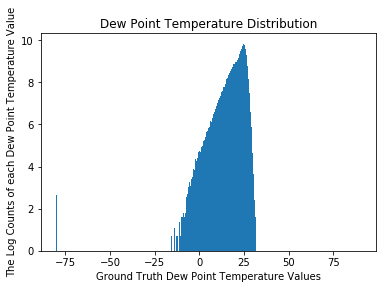

In [46]:
# group and count
Bins, Height = groupMe_count(_Dew_stValues)

# plot
plt.bar(Bins, height=Height,linestyle='solid',width=0.3)
plt.title("Dew Point Temperature Distribution")
plt.xlabel("Ground Truth Dew Point Temperature Values")
plt.ylabel("The Log Counts of each Dew Point Temperature Value")
plt.show()


In [ ]:
'''
pressTarget: tensor([161., 178., 161., 166., 179., 180.,  73.,  89.,  74.,  57.,  74.,  77.,
        139., 150., 148., 140., 145., 126.,  82.,  93.,  96.,  92., 118., 121.,
         64.,  80.,  78.,  78.,  89.,  73.,  66.,  59.,  68.,  68.,  62.,  81.,
        101.,  98., 107.,  99.,  96., 108., 106., 112., 108., 112., 132., 121.,
         73.,  77.,  59.,  55.,  71.,  73.,  10.,  20.,  45.,  53.,  57.,  75.,
        146., 135., 141., 133., 138., 136.,  78.,  83.,  86.,  84.,  95., 102.,
        134., 126., 140., 133., 131., 168.,  69.,  65.,  74.,  61.,  58.,  69.,
        139., 133., 138., 122., 114., 120., 110., 116., 110., 113., 137., 124.,
         94., 104.,  87.,  80.,  88., 100.,  27.,  20.,  37.,  41.,  43.,  50.,
        121., 138., 145., 152., 168., 178.,  67.,  84.,  82.,  80.,  97.,  81.,
        100., 110., 100., 100., 113., 102., 141., 156., 152., 150., 159., 150.,
        105., 119., 113., 119., 131., 134., 123., 127.,  79.,  72., 140., 102.,
         68.,  74.,  55.,  46.,  68.,  74., 134., 150., 143., 144., 158., 160.,
        160., 168., 156., 155., 168., 153.,  91.,  95., 117., 101., 116., 117.,
         59.,  78.,  73.,  77.,  91.,  67., 118., 126., 112., 108., 130., 156.,
         97., 105.,  79.,  82.,  89.,  88.,  76.,  72.,  85.,  80.,  75.,  95.,
        203., 223., 178., 163., 191., 182.,  85.,  97.,  83.,  78.,  83.,  64.,
         24.,  44.,  41.,  57.,  73.,  77.,  87.,  78.,  89.,  90.,  87., 102.,
         95., 106.,  79.,  81.,  98.,  99.,  90.,  99.,  88.,  86.,  92.,  99.,
         36.,  38.,  49.,  39.,  34.,  54., 104.,  93., 112.,  85.,  78.,  79.,
        102., 104., 116., 107., 107., 129., 110., 117., 113., 116., 136., 138.,
        170., 176., 160., 161., 175., 161., 106., 102., 114., 100.,  96., 107.,
        170., 172., 177., 160., 165., 176., 157., 172., 166., 170., 183., 184.,
        135., 134., 149., 139., 138., 145.,  44.,  68.,  80.,  74.,  90.,  76.,
         75.,  79.,  87.,  66.,  66.,  83., 153., 167., 155., 146., 148., 135.,
         92.,  93., 114., 106., 112., 128., 108., 106., 112., 108., 112., 132.,
         67.,  71.,  53.,  49.,  63.,  68.,  61.,  65.,  78.,  74.,  81.,  96.,
        110., 123., 122., 126., 143., 114.,  66.,  61.,  74.,  72.,  76.,  86.,
        151., 160., 142., 145., 154., 148., 157., 161., 178., 161., 166., 179.,
         39.,  44.,  68.,  64.,  68.,  90.,  91., 103., 104., 104., 117., 114.,
         94.,  92., 103.,  82.,  83., 101., 130., 122., 136., 144., 145., 158.,
        137., 142., 105.,  86., 120., 114., 139., 148., 137., 131., 139., 121.,
        112., 130., 129., 127., 137., 132., 130., 126., 144., 141., 141., 163.,
        110., 119., 113., 102., 106.,  93., 148., 147., 155., 140., 155., 176.,
        103., 104.,  90.,  83., 105.,  81.,  91., 106.,  92.,  85., 101., 108.,
         98., 107.,  95.,  91., 109., 104., 136., 137., 140.,  98.,  85., 117.,
        137., 158., 143., 144., 152., 140.,  61.,  75.,  56.,  54.,  75.,  74.,
        129., 139., 115., 111., 119.,  98.,  93.,  89.,  98.,  85.,  93., 112.,
        107., 111., 106., 105., 110., 106., 155., 148., 192., 165., 165., 191.,
        166., 189., 160., 162., 201., 182., 154., 172., 144., 151., 179., 165.,
         34.,  53.,  48.,  48.,  63.,  50., 142., 153., 108.,  98., 131., 131.,
        166., 178., 171., 174., 187., 136., 106., 105., 119., 113., 119., 131.,
         92.,  90., 101.,  80.,  84., 103.,  71.,  86.,  68.,  64.,  74.,  64.,
        121., 131., 132., 132., 145., 142.,  42.,  51.,  41.,  36.,  54.,  62.,
         43.,  42.,  59.,  37.,  36.,  52.,  93., 106., 103., 101.],
         
'''